#Policy Based Methods

Mario Fiorino

$\;$

**Introduzione**

I metodi presentati nei notebook precedenti (noti come approcci "value-based" o "action-value methods") si basano sulla funzione valore $Q(s,a)$ . Ovvero:

- Si apprendere la funzione $Q(s,a)$ attraverso l'interazione con l'ambiente.  

- Una volta appresa tale la funzione, l'agente seleziona l'azione da intraprendere nello stato corrente $s$ basandosi sui valori stimati di $Q(s,a)$. Tipicamente, viene scelta l'azione che massimizza il valore di $Q(s,a)$.

-  Tali metodi non esplicitano una funzione policy $\pi:  a → s $, poichè questa è implicitamente determinata dai valori di $Q(s,a)$.

$\;$

I metodi "policy-based" invece:

Apprendono una mappatura (funzione di policy) diretta dallo stato all'azione, senza la necessità di consultare una funzione valore stato-azione $Q(s,a)$.

Ad esempio, questa mappatura può essere implementata utilizzando una rete neurale dove il valore dei parametri, pesi e bias, è determinato durante l'addestramento per massimizzare il return.

$\;$

Vantaggi

- Presentano una buona efficacia nei "High-dimensional space" ed/o nei "Continuous action spaces".

- Semplificano l'implementazione quando la policy da apprendere è di tipo stocastico: cioè che descrive una distribuzione di probabilità sulle azioni.

- Tali medoti consentono di sfruttare eventuali conosceze pregressa sulla forma desiderata della funzione di policy.

Svantaggi:

- Presentano un'alta varianza; tendendo a convergere verso un ottimo locale, piuttosto che verso l'ottimo globale.

## Idee di base



**Notazioni**

$\textbf{θ}$ è il vettore dei parametri della policy $\pi_\theta$ , con dimensioni $d'$. Ovvero : $\textbf{θ} \in R^{d'}$

$\pi(a|s, \textbf{θ}) = Pr \{ A_t =a | S_t =s, \textbf{θ}_t = \textbf{θ} \} \; \; $  indica la probabilità che l'azione $a$ venga intrapresa nello stato $s$ al tempo $t$, con i parametri della policy uguali $\textbf{θ}$.

$J(\textbf{θ})$ è una funzione, spesso chiamata **funzione obiettivo** (*objective function*), che misura le performance policy ${\pi_\theta}$, dipendente dalla variazione dei suoi parametri. Ad esempio negli ambienti episodici, un modo molto semplice per valutare tale rendimento, è quello di scegliere la value fuction della policy nello stato di partenza, cioè expected return ottenuto seguendo tale policy,  partendo da uno specifico stato iniziale :
$J(\textbf{θ}) = V_{\pi_\theta} (s_{0}) = \mathbb{E}_{ {\pi_\theta}} [ \sum_{t=0}^{T} r_t | s_0] $ .

Si noti, in questa introduzione, per semplicità didattica, si assume che il discount factor $\gamma = 1 $, e,  si considera un numero finito di episodi.

$s_0$ indica lo stato iniziale.

$r_t$ è il reward ottenuto allo step $t$.

$T$ è lo step nel Terminal state.

Sia  $\tau$ una certa traiettoria di eventi stato-azione campionata da $\pi_\theta$ che parte da un stato $s_0$ (  Nota, in questa semplice formulazione, assumerò che il valore di $s_0$ sia costante, ossia l'agente inizierà ogni volta dallo stesso stato, generando da lì diverse traiettorie)

$\tau = (s_0, a_0, s_1, a_1, ..., s_T).$

Allora:

$  \mathbb{E}_{ {\pi_\theta}} [ \sum_{t=0}^{T} r_t | s_0] = \mathbb{E}_{\tau\sim \pi_θ} [R(\tau)] = \int_{\tau} P(\tau|\pi_\theta) R(\tau) $

Dove $R(\tau)$ è il "Return", ovvero la somma totale dei reward ottenuti seguendo una certa traiettoria $\tau$ di eventi stato-azione campionati da $\pi_\theta$.

Mentre $P(\tau|\pi_\theta)$ è la probabilità di ottenere $\tau$ segeundo una certa policy $\pi_\theta$. Per essere formalmente più precisi:

$P(\tau|\pi_\theta) =  \prod_{t=0}^{T-1} P(s_{t+1} | s_t, a_t) \pi_\theta(a_t | s_t)$

La formula evidenzia come il campionamento di una traiettoria sia condizionato:
- dalla policy $\pi_\theta$  
- dal modello di transizione, che descrive la probabilità di passare da uno stato all'altro: la così detta "dinamica dell'ambiente"; nei contesti model-free ignota.

Nota nella produttoria abbiamo $T-1$, in quanto $P(s_{T} | s_{T-1}, a_{T-1})$; dove $s_T$ è lo stato terminale

$\;$

**Obiettivo**:

Stimare (o apprendere) i parametri $\textbf{θ}$  della policy al fine di massimizzare il valore della funzione obiettivo.

$\;$

Come?

Per risolvere tale problema, si possono impiegare diverse strategie, le più comuni si suddividono in due categorie:

Metodi non basati sul gradiente:

- Hill climbing (Questo metodo esplora lo spazio dei parametri in modo iterativo, muovendosi nella direzione che aumenta i valori della funzione obiettivo)

- Simplex / amoeba / Nelder Mead

- Genetic algorithms

Metodi basati sul gradiente:

- Gradient descent

- Conjugate gradient

- Quasi-newton


In questo notebook, ci concentriamo specificamente sull' approccio Gradient descent; data la sua ampia diffusione, e la sua efficacia in molti scenari.

## Policy Gradient

L'idea di fondo dei metodi policy gradient è quello di ottimizzare la policy del sistema incrementando la probabilità di azioni che conducono a rendimenti più elevati, e diminuendo la probabilità di azioni associate a rendimenti inferiori.

$\;$

Consideriamo la funzione obiettivo descritta nell'introduzione:

$ J(\textbf{θ}) = \mathbb{E}_{\tau\sim \pi_θ} [R(\tau)]  $

Gli algoritmi policy gradient si prefiggono di individuare quei valori ottimali dei parametri $\mathbf{θ^{*}}$ che definiscono la policy $\pi_\mathbf{θ}$, con l'obiettivo di massimizzare la funzione obiettivo $J(\mathbf{θ})$.
Per realizzare ciò, questi algoritmi impiegano la tecnica del **Gradient ascent optimization**, ovvero, aggiornando i parametri nel seguente modo:

$\mathbf{\theta_{k+1}} = \mathbf{\theta_k} + \alpha \nabla_{\mathbf{\theta}} J(\mathbf{\theta_k}) \; \;$ $\; \;$  

Nota formale - limitazioni di LaTeX nel notebook: se pur nell'equazione esposta, i parametri $\mathbf{{\theta_k}}$ non sono rappresentati in grassetto, sono sempre da pensarsi come vettori di dimensione $d'$.

$\;$

**Problema** : Come ricavare  $\nabla_{\theta} J(\textbf{θ})$ ?

Non è sempre possibile ricavare la derivata ("in forma chiusa") di  $\mathbb{E}_{\tau\sim \pi_θ} [R(\tau)] $ rispetto a $\textbf{θ}$, in quanto, in genere, non abbiamo una forma analitica esplicita di questa dipendente da $\textbf{θ}$ ( per definizione, nei contesti model-free la dinamica dell'ambiente e la funzione reward sono del tutto ignoti)

Quindi non possiamo calcolare direttamente il gradiente $\nabla_{\theta} J(\mathbf{θ})$.

Che fare?

#####Soluzione: **Policy Gradient Theorem**

Il teorema Policy Gradient fornisce un'espressione analitica computazionalmente fattibile del gradiente in questione:

$\nabla_{\theta} J(\mathbf{θ}) = \mathbb{E}_{\tau\sim \pi_θ} [\; \sum_{t=0} ^ {T} R_t(\tau)  \cdot  \nabla_{\theta} \log \pi_{θ}(a_t|s_t) \; ] $

Dove:

$R_t(τ ) = \sum_{t'= t} ^{T} r_{t'}$ cioè la somma dei singoli reward raccolti dallo step temporale $t$ alla fine della traiettoria.

$\;$

Per la verifica analitico-matematica del teorema:

Foundations of Deep Reinforcement Learning, Graesser & Wah Loon Keng, PDF 57

oppure, altre versioni:

Sutton & Barto, 2018, PDF 347

o:

https://users.ece.cmu.edu/~yuejiec/ece18813B_notes/lecture12-policy-optimization.pdf

$\;$

In pratica, il teorema esprime una relazione tra il gradiente della policy: $\nabla_{\theta} \pi(a|s)$, un vettore colonna che possiamo campionare, ed, il gradiente $ \nabla_{\theta} J(\mathbf{θ})$.
Quindi, così espresso, possiamo usare un campionamento per approssimarlo.

$\;$

Formulazione generale in sintesi:

Sia $X$ una variabile casuale, e data una funzione di densità di probabilità  $p_θ(x)$. Si definisce funzione obiettivo $J(θ)$:

$J(θ)=\mathbb{E_{x∼p_θ(x)}}[f(x)] = ∫_x f(x)p_{θ} (x)dx$

Per $f(x)$ funzione arbitraria che non dipende da $θ$

Vogliamo calcolare $∇_θ J(θ)$.

Con delle manipolazioni matematiche, possiamo cambiare il gradiente dell'expectation nell'expectation del gradiente; saltando molti passaggi otteniamo:

$ ∇_θ J(θ) = ∇_θ ∫_x f(x) ∇_θ p_θ(x) dx = \mathbb{E}[f(x)∇_θ \log(p_θ(x) )]$

Si osservi, che avremmo potuto scegliere anche un'altra funzione obiettivo, il risultato finale del Policy Gradient Theorem è indipendente da questa scelta.

$\;$

Ref:

Foundations of Deep Reinforcement Learning: Theory and Practice in Python di Laura Graesser, Wah Loon Keng.

Reinforcement Learning: An Introduction. Richard S. Sutton and Andrew G. Barto. 2018

Compendio Policy Gradient Algorithms, chiaro e completo:

https://lilianweng.github.io/posts/2018-04-08-policy-gradient/

Corso di David Silver:

https://www.youtube.com/watch?v=KHZVXao4qXs

Elliot Waite - Machine learning video; un ottima spiegazione con un esempio pratico:

https://www.youtube.com/watch?v=cQfOQcpYRzE

A List of Reinforcement Learning Derivations

https://www.alexirpan.com/rl-derivations/

*

Expectation and Functions of Random Variables

https://imai.fas.harvard.edu/teaching/files/Expectation.pdf


*

Per capire al meglio la tecnica "Gradient ascent optimization", si provi a ricavare con questa, a modo di esercizio, il punto in cui la funzione $J(x) = 3x - x^2$ assume il valore massimo. [Soluzione: La derivata di $J(x)$ è $ 3 - 2 x$ ; punto di massimo $x = 1.5$ ]



## REINFORCE (aka Monte Carlo Policy Gradient)


REINFORCE = REward Increment = Non-negative Factor × Offset Reinforcement × Characteristic Eligibility


L'algoritmo è stato introdotto da Ronald J. Williams nel 1992.

https://people.cs.umass.edu/~barto/courses/cs687/williams92simple.pdf

$\;$

Implementazione dell'algoritmo in pseudocodice:


<div>
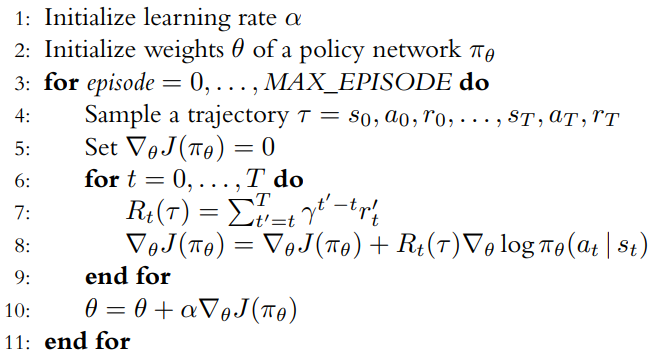
</div>

**Idee chiave**:

- L' apprendimento dei parametri $\mathbf{θ}$ avviene tramite la tecnica *Gradient ascent optimization* . Per implementarla si sfrutta il *Policy Gradient Theorem*, così da ricavare $\nabla_{\theta} J(\mathbf{θ})$.

- Il campionamento di $\nabla_{\theta} J(\mathbf{θ})$ viene effettuato utilizzando il metodo Monte Carlo. Questo significa che, per ogni episodio, viene generata una traiettoria (ottenuta dall'interazione dell'agente con l'ambiente, seguendo una certa policy $\pi_θ$) fino ad uno stato terminale.

- Generata la traiettoria, vengono calcolati i return parziali $R_t$ per ogni time step $t$ :  questi rappresentano il ritorno accumulato a partire da ogni step $t$ fino allo stato terminale. Questi return parziali vengono combinati tra loro attraverso una somma pesata, dove il peso associato a ciascun step è dato da $\nabla_{\theta} \log \pi_{θ}(a_t|s_t)$; così da ottenere una stima di $\nabla_{\theta} J(\mathbf{θ})$ .

Si noti:

L' aggiormento dei parametri avviene esclusivamente al termine, e, per ogni traiettoria campionata.

Solo una volta ottenuti i nuovi parametri, viene estratta una nuova traiettoria.

**Convergenza**

Per valori di $α$ sufficentemente piccoli,
è garantito un miglioramento delle prestazioni della policy nella massimizzazione della ricompensa.

La convergenza verso un ottimo locale è garantita con le condizioni di approssimazione stocastica (stochastic approximation conditions) standard, viste più volte in questi notebook, per $α$ decrescente.

$\;$

**Svantaggi**


Come nel metodo Monte Carlo classico, in cui ogni coppia stato-azione di una traiettoria è generata in modo completamente casuale, REINFORCE può soffrire di un'elevata varianza. Questo comporta:  

- Rallentamento nell'apprendimento: il miglioramento delle policy avviene di rado, causando una convergenza lenta.  

- Tendenza a convergere su ottimi locali: raggiungere l'ottimo globale richiede spesso tempi impraticabili.  

Numerosi studi hanno affrontato tale problema dell'elevata varianza

Un primo meccanismo risolutivo estremamente semplice, descritto da Sutton e Barto (2018, PDF 351), è l'utilizzo di: REINFORCE with Baseline.

Tuttavia, i migliori risultati sono stati ottenuti con approcci Actor-Critic, come A2C, PPO, SAC e DDPG, che rappresentano attualmente gli algoritmi di RL-model free più utilizzati in molte applicazioni.  


### Env: Cart Pole (Gym)

Nota : In CartPole, l'agente riceve una ricompensa con un valore pari a $+1$ per ogni singolo time-step in cui riesce a mantenere l'equilibrio .

https://www.gymlibrary.dev/environments/classic_control/cart_pole/


https://github.com/openai/gym/wiki/Table-of-environments


In [ ]:
import gym

env=gym.make('CartPole-v1')
#help(env.unwrapped)

episodeNumber=2
max_timeSteps=3


for episodeIndex in range(1,episodeNumber):
    initial_state=env.reset()

    #print("Ep:",episodeIndex)
    #appendedObservations=[]

    for timeIndex in range(1,max_timeSteps+1):
        print("timeIndex=",timeIndex)

        random_action=env.action_space.sample()
        print("random_action=",random_action)

        observation, reward, done,  info = env.step(random_action)

        #appendedObservations.append(observation)

        print("[Cart Position,Cart Velocity,Pole Angle,Pole Angular Velocity]:",observation)
        print("reward=",reward)
        print("done=",done)
        print("info=",info)
        print("")

        if done:
            break

env.close()

timeIndex= 1
random_action= 0
[Cart Position,Cart Velocity,Pole Angle,Pole Angular Velocity]: [-0.03882672 -0.17139114  0.04385891  0.34949616]
reward= 1.0
done= False
info= {}

timeIndex= 2
random_action= 1
[Cart Position,Cart Velocity,Pole Angle,Pole Angular Velocity]: [-0.04225454  0.02308048  0.05084883  0.07095963]
reward= 1.0
done= False
info= {}

timeIndex= 3
random_action= 0
[Cart Position,Cart Velocity,Pole Angle,Pole Angular Velocity]: [-0.04179293 -0.1727322   0.05226803  0.37924212]
reward= 1.0
done= False
info= {}



###Moduli ed Inizializzazione ambiente

In [ ]:
import gym
import numpy as np
from collections import deque
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
torch.manual_seed(0)

import base64, io

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

env = gym.make('CartPole-v1')

### Premesse tecniche per una policy implementata tramite rete neurale

La **funzione softmax** trasforma un vettore di numeri reali in una distribuzione di probabilità.

In pratica, applica una funzione esponenziale a ciascun elemento, rendendolo positivo, e poi divide per la somma di tutti i valori esponenzializzati; ottenendo in uscita un valore compreso in un intervallo  $(0,1)$, e garantendo che la somma totale di tali valori di output risulti pari a $1$.

Input di $N$ numeri reali:

$[ z_1, z_2 ,...,z_i,...,z_N]$

Output della funzione softmax:

$[ \sigma(z_1),\sigma(z_2),...,\sigma(z_i),...,\sigma(z_N) ] = [\frac{e^{z_{1}}}{\sum_{j=1}^N e^{z_{j}}},\frac{e^{z_{2}}}{\sum_{j=1}^N e^{z_{j}}},..., \frac{e^{z_{i}}}{\sum_{j=1}^N e^{z_{j}}},... \frac{e^{z_{N}}}{\sum_{j=1}^N e^{z_{j}}} ]\ $


La funzione di softmax è spesso utilizzata nello strato di output delle reti neurali per gestire attività di classificazione.

Questa assicura che l'output del modello possa essere interpretato come un insieme di probabilità per ogni classe.

Nello scenario `'CartPole-v1'`, dove ci sono solo due azioni discrete ($N = 2$), la funzione softmax produce una distribuzione di probabilità su queste due azioni. Un output interpretabile in questo modo:

$[\pi(a_0 | s_t ),\pi(a_1 | s_t )]$


In [ ]:
v = np.array([[1,4,3],
              [1,6,0]])
v =  torch.from_numpy(v).float()

# Funzione softmax in Pytorch
# dim (int) – A dimension along which Softmax will be computed (so every slice along dim will sum to 1)

softmax0 = torch.nn.Softmax(dim=0) # Applies along columns
print(softmax0(v))

tensor([[0.5000, 0.1192, 0.9526],
        [0.5000, 0.8808, 0.0474]])


In [ ]:
softmax1 = torch.nn.Softmax(dim=1) # Applies along rows
print(softmax1(v))

tensor([[0.0351, 0.7054, 0.2595],
        [0.0067, 0.9909, 0.0025]])


In [ ]:
# Scenario CartPole-v1, ultima layer della NN
tc = np.array([[-0.0344,  0.0977]])  # logit
tc =  torch.from_numpy(tc).float()

softmax2 = torch.nn.Softmax(dim=1)   # la "funzione di attivazione"
print(softmax2(tc))

tensor([[0.4670, 0.5330]])


I due tipi più comuni di **policy stocastiche** nell'ambito della Deep RL sono
- le *categorical policies*
- le *diagonal Gaussian policies*

Si mostrerà in seguito come due concetti sono di fondamentale importanza per l'utilizzo e l'addestramento delle policy stocastiche:

- il campionamento (sampling) delle azioni dalla policy

- log-prob : ovvero il logaritmo di probabilità di estrare un azione specifica seguendo una certa policy, in simboli  $\log \pi_{\theta}(a_t|s_t)$.


**Categorical policy**

Una *categorical distribution* è una forma specifica di distribuzione di probabilità per variabili aleatorie discrete, che riguarda variabili che assumono valori da un insieme finito di categorie distinte.

Una *Categorical Policy* è una policy che assegna a ciascuna delle possibili azioni discrete in un determinato stato, una certa probabilità di essere campionata.

Questa viene rappresentata da una "categorical distribution".

In termini di reti neurali, esse possono essere pensate come classificatori: che ad ogni azione, associano a una probabilità.

Implementazione:

La classe `Categorical` in PyTorch implementa una distribuzione di probabilità discreta. Si può specificare la distribuzione in due modi (ma non contemporaneamente):

- Probabilità (probs): Tramite un tensore contenente le probabilità relative di ciascuna categoria. La somma degli elementi di questo tensore deve essere pari a 1 (lungo la dimensione specificata durante il campionamento).

- Logit (logits): Tramite un tensore contenente i logit (output non normalizzato in senso probabilistico) per ciascuna categoria.

Se probs è unidimensionale con lunghezza $N$, ciascun elemento rappresenta la probabilità relativa di campionare la categoria corrispondente all'indice.
 ovvero i campioni saranno interi da ${0,…,N−1}$

Info:

https://pytorch.org/docs/stable/distributions.html

In [ ]:
#Premessa: log_prob
# Restituisce semplicemente il logaritmo della probabilità che si verifichi un determinato campione (o categoria)
# estratto dalla distribuzione.
# L'uso delle probabilità logaritmiche significa rappresentare le probabilità su una scala logaritmica (- ∞ , 0 ]
#https://en.wikipedia.org/wiki/Log_probability
#https://chrispiech.github.io/probabilityForComputerScientists/en/part1/log_probabilities/

print("E1")
m = Categorical(torch.tensor([ 0.25, 0.25, 0.25, 0.25 ]))
s = m.sample() # è un tensore che contiene l'indice campionato del vettore [ 0.25, 0.25, 0.25, 0.25 ].
print(s)       # Nota: in questo cosa ci sono uguali probabilità di campionare: tensor(0), tensor(1), tensor(2), tensor(3)
print(type(s)) # <class 'torch.Tensor'>

print(m.log_prob(s)) #  Nota: il ln(0.25) = -1.38629436112 ; ln : "natural logarithm"
print(np.ones(1)*3)  # = [3.]
print(m.log_prob(torch.from_numpy(np.ones(1)*3)))
# la log_probabilità di campionare 3. è uguale a quella di campionare 0.
print(m.log_prob(torch.from_numpy(np.ones(1)*3)) == m.log_prob(torch.tensor([0.])) )

E1
tensor(0)
<class 'torch.Tensor'>
tensor(-1.3863)
[3.]
tensor([-1.3863])
tensor([True])


In [ ]:
print("E2")
m = Categorical(torch.tensor([ 0.9999, 0.00001 ]))
s = m.sample()
print(s)  # quasi sempre campiona 0
print(m.log_prob(s))
print(m.log_prob(torch.from_numpy(np.ones(1))))
print(m.log_prob(torch.from_numpy(np.zeros(1))))


E2
tensor(0)
tensor(-1.0014e-05)
tensor([-11.5128])
tensor([-1.0014e-05])


In [ ]:
print("E3")  # Scenario CartPole-v1
m = Categorical(torch.tensor([[0.4670, 0.5330]]))
s = m.sample()
print(s)
print(m.log_prob(s))
print(m.log_prob(torch.tensor([0.])))
print(m.log_prob(torch.tensor([1.])))

E3
tensor([1])
tensor([-0.6292])
tensor([-0.7614])
tensor([-0.6292])


In [ ]:
print("E4")
m = Categorical(torch.tensor([1, 870, 19.9 ])) # qui lavora con i logit
s = m.sample()
print(s)
print(m.log_prob(s))
print(m.log_prob(torch.tensor([0.])))
print(m.log_prob(torch.tensor([1.])))
print(m.log_prob(torch.tensor([2.])))

E4
tensor(1)
tensor(-0.0237)
tensor([-6.7922])
tensor([-0.0237])
tensor([-3.8015])


**Diagonal Gaussian Policy**

Le *Diagonal Gaussian Policy* sono un tipo particolare di policy utilizzate quando lo spazio delle azioni è continuo. In questo caso, una certa azione è rappresentata da un vettore n-dimensionale (con $n > 1$) a valori reali; pertanto, è necessario definire una distribuzione di probabilità su vettori a valori reali.

Il modo più comune per rappresentare queste politiche è utilizzare una *Diagonal Gaussian distribution*, ovvero una *Distribuzione normale multivariata* la cui matrice di covarianza ha solo voci sulla diagonale (tutti gli altri sono sempre nulli - i.e. le diverse dimensioni dell'azione sono considerate indipendenti tra loro). Di conseguenza, tale matrice può essere rappresentata tramite un vettore di sole deviazioni standard.

Per implementare una *Diagonal Gaussian Policy*, di solito si utilizzia una rete neurale che mappa gli stati $s_t$, in un *means vector* delle azioni, $\mathbf{\mu} (s_t)$ : dove ciascuna componente rappresenta la media della corrispondente componente del vettore azione.

In più, si utilizza un vettore legato alle informazioni della deviazioni standard, che può essere implementato in diversi modi:

- Il più semplice, definendo un vettore composto da valori costanti delle deviazioni standard: $\sigma$, una per ciascun componente del vettore azione.

- Con una rete neurale specifica che mappa gli stati $s_t$ in un vettore dei logaritmi delle deviazioni standard, $\log \sigma_{\theta}(s_t)$, sempre una per ciascun componente del vettore azione.

- Usando la stessa rete neurale che ha prodotto il *means vector* delle azioni, condividendone il layer finale (o "attaccandosi" ad altri layer); al fine di ottenere il vettore dei logaritmi delle deviazioni standard, $\log \sigma_{\theta}(s_t)$.

- Definendo il vettore dei logaritmi delle deviazioni standard, $\log \sigma$, tramite parametri indipendenti ("standalone parameters") cioè che non sono direttamente collegati a una rete neurale, a un layer specifico della rete, né dipendono funzionalmente dallo stato $s_t$.

Si noti:

generalmente, si preferisce apprendere i logaritmi delle deviazioni standard, piuttosto che le deviazioni standard stesse; in quanto i log std sono liberi di assumere qualsiasi valore in $(-\infty, \infty)$, mentre gli std devono essere non negativi $(0, \infty)$.
L'addestramento dei parametri risulta facilitato in assenza di vincoli di questo tipo.

Questa scelta non comporta alcuna complicazione, poiché le deviazioni standard originali possono essere facilmente recuperate applicando la funzione esponenziale ai logaritmi delle deviazioni standard.

In matematica; sia $log$ un logaritmo naturale (o logaritmo neperiano), allora:  $\log(x) = y \Leftrightarrow e^y = x$

Ref.

Covariance Matrix :
https://www.youtube.com/watch?v=OHojomysBJM

Stochastic policies:
https://avandekleut.github.io/reinforce/#:~:text=Diagonal%20Gaussian%20policies%20define%20a,distribution%20over%20real%2Dvalued%20vectors.


In [ ]:
# Nota matematica sulla relazione tra "log" e "exp"

import math

print(math.log(2.))  # si intende il log in base naturale
print(torch.exp(torch.tensor([math.log(2.)])))


0.6931471805599453
tensor([2.])


La classe `MultivariateNormal` in PyTorch implementa una distribuzione normale multivariata, definita da un vettore delle medie e una matrice di covarianza.

Questa classe consente in modo diretto:
- il campionamento(sampling),
- il calcolo del logaritmo della *joint probability density*, ovvero: si consideri un campione $v$, un vettore: $[v_1, v_2, ..., v_i, ..., v_n]$ i cui compomenti sono numeri reali estratti da distribuzioni normali, rispettivamente definite da $ \theta_i = [\mu_i, \sigma_i]$; sia $\mathbf{θ}$ il vettore dei parametri che le definisce. Allora il log della *joint probability density* del campione $v$ è dato dalla formula: $\log ( L (v | \theta) ) = -\frac{1}{2}\left(\sum_{i=1}^n \left(\frac{(v_i - \mu_i)^2}{\sigma_i^2} + 2 \log \sigma_i \right) + k \log 2\pi \right)$

Si ricordi, a riguardo dell'ultimo punto che:

per le variabili casuali continue, non ha senso determinare la probabilità che la variabile assuma un valore specifico, come per le variabili discrete, poiché questa probabilità è sempre nulla ( essendo infiniti casi possibili; $ 1 / \infty  = 0 $).

Tuttavia, ha senso parlare della probabilità che la variabile casuale assuma valori all'interno di un intervallo, anche molto piccolo. Per questo motivo, si introduce la funzione di densità di probabilità (o PDF: Probability Density Function), che descrive la probabilità che una variabile casuale continua assuma un valore all'interno di un intervallo specificato nello spazio campionario [ *Intuitivamente, la densità di probabilità in un punto rappresenta la "concentrazione" di probabilità attorno a quel punto. Più la densità è alta, maggiore è la probabilità che la variabile aleatoria assuma un valore vicino a quel punto* ].

Estendendo il concetto di densità di probabilità a più di una variabile aleatoria continua otteniamo: la funzione densità di probabilità congiunta (joint probability density).

Ad esempio, la densità di probabilità congiunta: *dpc(x, y)* di due variabili casuali continue X e Y (che possono essere tra loro indipendenti o meno) rappresenta la probabilità relativa di osservare valori di X e Y nelle immediate vicinanze del punto (x, y).


Ref.

http://progettomatematica.dm.unibo.it/Prob2/6funzionedidens.html

https://www.statlect.com/glossary/log-likelihood

https://statlect.com/glossary/joint-probability-density-function



In [ ]:
#https://pytorch.org/docs/stable/distributions.html#multivariatenormal

#Creates a multivariate normal (also called Gaussian) distribution parameterized
# by a mean vector and a covariance matrix.

v = np.array([1.5, 45, 39.5])       # means vector
mu =  torch.from_numpy(v).float()

sig = np.array([0.8, 10, 0.01])     # dev-std vector
sigma = torch.from_numpy(sig).float()
print(torch.diag(sigma))            # covariance matrix

pi = torch.distributions.MultivariateNormal(mu, torch.diag(sigma))

s = pi.sample()  # Essendo un punto nello spazio dimendionale 3D;
                 # campiona tre valori: estratti dalle rispettive distribuzioni gaussiane
                 # con media "mu" e std "sigma"
print(s)
print(pi.log_prob(s))   # Ricava il log-prob

tensor([[8.0000e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e-02]])
tensor([ 0.8567, 43.7245, 39.4403])
tensor(-2.0119)


Per avere una comprensione più chiara della funzione di densità di probabilità.

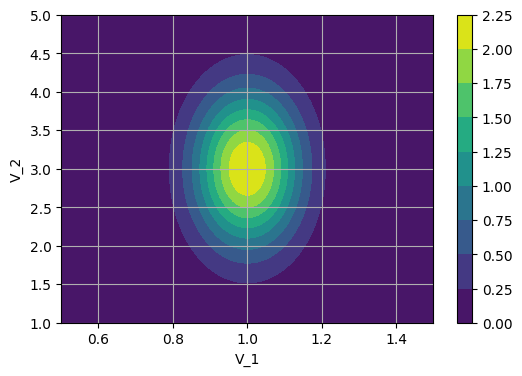

Campione estratto : tensor([1.0887, 3.5430])
Log(Probability Density) : tensor(0.1229)
Probability Density      : tensor(1.1308)


In [ ]:
# Definisco la distribuzione
v = np.array([1., 3.])          # means vector
mu =  torch.from_numpy(v).float()

sig = np.array([0.01, 0.5])     # dev-std vector
sigma = torch.from_numpy(sig).float()

pi = torch.distributions.MultivariateNormal(mu, torch.diag(sigma))
                                          # Si noti
                                          # torch.diag(sigma) :  una matrice di covarianza con diagonale non nulla
                                          # e fuori diagonale nulla indica che le variabili tra loro indipendenti.

# Creo una grid per il plotting
x = np.linspace(0.5, 1.5, 100)
y = np.linspace(1, 5, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Calcolo la probability density
Z = torch.from_numpy(pos).float()
prob_density = torch.exp(pi.log_prob(Z)).numpy()

# Plot della probability density
plt.figure(figsize=(6, 4))
plt.contourf(X, Y, prob_density, levels=10, cmap='viridis') # level=10, per i valori della Probability Density
plt.colorbar()
plt.xlabel('V_1')
plt.ylabel('V_2')
plt.grid()
plt.show()

s = pi.sample()
print("Campione estratto :", s)
print("Log(Probability Density) :", pi.log_prob(s))
print("Probability Density      :", torch.exp(pi.log_prob(s)))


Esempio di implementazione di una *Diagonal Gaussian Policy* , che definisce il vettore dei logaritmi delle deviazioni standard, $\log \sigma$, tramite parametri indipendenti.

In [ ]:
#Codice di riferimento :
# https://avandekleut.github.io/reinforce/#:~:text=Diagonal%20Gaussian%20policies%20define%20a,distribution%20over%20real%2Dvalued%20vectors.

class DiagonalGaussianPolicy:
    def __init__(self, env=None, lr=1e-3):

        self.dim_state = 2  # env.observation_space.shape[0]
        self.dim_action = 5 # env.action_space.shape[0]

        self.mu = torch.nn.Sequential(
            torch.nn.Linear(self.dim_state, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, self.dim_action)
        )

        self.log_sigma = torch.ones(self.dim_action, requires_grad=True)

        self.opt = torch.optim.Adam(list(self.mu.parameters()) + [self.log_sigma], lr=lr)

    def d_pi(self, s_t):
        s_t = torch.as_tensor(s_t)

        mu = self.mu(s_t)

        log_sigma = self.log_sigma
        sigma = torch.exp(log_sigma)

        pi = torch.distributions.MultivariateNormal(mu, torch.diag(sigma))
        return pi

    def act(self, s_t):
        pi = self.d_pi(s_t)

        s = pi.sample()
        log_prob = pi.log_prob(s)
        return s, log_prob


In [ ]:
# Test
es =  DiagonalGaussianPolicy()

for _ in range(5):
   sam,lg_p = es.act([1.5,2.6])
   print(sam,"\n",lg_p)
   print("")

tensor([ 1.4882,  1.5517,  0.2731, -0.6836,  0.0581]) 
 tensor(-8.2581, grad_fn=<SubBackward0>)

tensor([-3.1596, -0.3767,  2.2847, -1.3025, -0.1868]) 
 tensor(-10.3941, grad_fn=<SubBackward0>)

tensor([ 2.0875, -1.1980, -1.2228,  1.5360, -0.7728]) 
 tensor(-8.7581, grad_fn=<SubBackward0>)

tensor([-2.1970, -2.3320,  1.5046, -1.3329,  0.8451]) 
 tensor(-9.6521, grad_fn=<SubBackward0>)

tensor([-0.3607,  1.6623, -3.6963,  3.0831, -0.4386]) 
 tensor(-12.1550, grad_fn=<SubBackward0>)



###Policy implementata tramite rete neurale

La rete neurale che useremo nel training produce in uscita una certa distribuzione di probabilità discreta sulle azioni disponibili.

'CartPole-v1' ha due azioni discrete per ogni stato; la rete produce in uscita una distribuzione del tipo $[0.21 \;\; 0.79]$.

Si noti: per garantire l’esplorazione e quindi l'apprendimento, si richiede che la policy non diventi mai puramente deterministica.


In [ ]:
#Codice ispirato :
#https://github.com/goodboychan?tab=repositories

class Policy(nn.Module):

    #Definiamo una ANN a due layer fully connected con relative activation function
    def __init__(self, state_size=4, action_size=2, hidden_size=32):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)  # Matrice pesi fc1.weight: torch.Size([32, 4])
        self.activation1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, action_size) # Matrice pesi fc2.weight: torch.Size([2, 32])
        self.activation2 = torch.nn.Softmax(dim=1)     # Nota: per (dim=0) produce chiaramente [[1., 1.]]

    def forward(self, state):
        x = self.fc1(state)
        x1 = self.activation1(x)
        x2 = self.fc2(x1)  # è una roba del tipo: tensor([[-0.0344,  0.0977]], grad_fn=<AddmmBackward0>)
        x3 = self.activation2(x2)
        return x3

    # Definiamo un modo per campionare un azione e ricavare log della sua probabilità
    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device) # questo rigo evita il TypeError:
                              # linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

        probs = self.forward(state).cpu()

        model = Categorical(probs)
        action = model.sample() #  campiona l'azione usando i risultati della rete neurale
        return action.item(), model.log_prob(action)

In [ ]:
#Testing della classe

p = Policy().to(device)
state = env.reset()

for timeIndex in range(1,2):

        state1 = torch.from_numpy(state).float().unsqueeze(0)
        print("p.forward(state)=", p.forward(state1))

        action, log_prob = p.act(state)
        print("action=",action)
        print("log_prob=",log_prob)

        state, reward, done, _ = env.step(action)

        if done:
            break

env.close()

p.forward(state)= tensor([[0.5816, 0.4184]], grad_fn=<SoftmaxBackward0>)
action= 0
log_prob= tensor([-0.5419], grad_fn=<SqueezeBackward1>)


### Premesse alla REINFORCE Core function


In [ ]:
#Premssa Tecnica 1:
# torch.cat serve a concatenare o unire tensori lungo una dimensione specificata.
#https://pytorch.org/docs/stable/generated/torch.cat.html

x = torch.randn(2, )
print(x)
y = torch.randn(1, )
print(y)

print(torch.cat([x,y],dim=0))
print( (torch.cat([x,y],dim=0))[0])    # Accesso ad un elemento di torch.cat
print("sum=", torch.cat([x,y]).sum())  # Somma i componenti di torch.cat

tensor([-0.3359,  0.1574])
tensor([-0.1858])
tensor([-0.3359,  0.1574, -0.1858])
tensor(-0.3359)
sum= tensor(-0.3644)


In [ ]:
x = torch.randn(2,3)
print(x)
print("")
print(torch.cat([x, x, x],dim=0))
print("")
print(torch.cat([x, x, x],dim=1))

tensor([[-2.8238,  1.3212, -0.5233],
        [-1.6234,  0.6547,  0.1918]])

tensor([[-2.8238,  1.3212, -0.5233],
        [-1.6234,  0.6547,  0.1918],
        [-2.8238,  1.3212, -0.5233],
        [-1.6234,  0.6547,  0.1918],
        [-2.8238,  1.3212, -0.5233],
        [-1.6234,  0.6547,  0.1918]])

tensor([[-2.8238,  1.3212, -0.5233, -2.8238,  1.3212, -0.5233, -2.8238,  1.3212,
         -0.5233],
        [-1.6234,  0.6547,  0.1918, -1.6234,  0.6547,  0.1918, -1.6234,  0.6547,
          0.1918]])


In [ ]:
pol_l = [torch.tensor([12.8589], requires_grad=True),
         torch.tensor([12.5127], requires_grad=True),
         torch.tensor([8.6259], requires_grad=True)]

print(pol_l)

# Concatena i tensori lungo la dimensione 0
pol_l = torch.cat(pol_l)

print(pol_l)  # Output: tensor([12.8589, 12.5127, 8.6259])

[tensor([12.8589], requires_grad=True), tensor([12.5127], requires_grad=True), tensor([8.6259], requires_grad=True)]
tensor([12.8589, 12.5127,  8.6259], grad_fn=<CatBackward0>)


In [ ]:
#Premssa Tecnica 2:
#loop for in "reverse mode"

print(list(range(5-1, -1, -1)))

for i in range(5-1, -1, -1):
      print(i)

[4, 3, 2, 1, 0]
4
3
2
1
0


Buono a sapersi:

Anche se non è il caso di Cart Pole, dove tutti i rewads sono uguali (e non verrà qui applicato); generalmente, per questioni di stabilità, si preferisce normalizzare il return dei rewards.

Se si analizza le equazioni di backpropagation, si osserva che il return influenza i gradienti. Per tale ragione, si vuole mantenere i valori campionati del return, in un intervallo specifico.

L' adozione di questa normalizzazione non si basa su solide garanzie teoriche, bensì su considerazioni di natura pratica.

In [ ]:
def normalize_rewards(r):
  # r è la lista contenente i rewads accumulati dell'episodio
  r = torch.tensor(r).to(device)
  print(r.mean())
  print(r.std())
  r = (r - r.mean()) / (r.std() + 1e-9)
  return r # ritorno la lista di reward normalizzati

### REINFORCE Core function

Note sulla funzione di loss implementata nel codice

Si ricordi che  il gradient ascent è esattamente l'opposto di gradient descent. Mentre gradient descent regola i parametri nella direzione opposta del gradiente per ridurre al minimo la loss function, il gradient ascent regola i parametri nella direzione del gradiente per trovarne i massimi (locali).

Per la realizzazione dell'algoritmo gradient ascent, si tenga a mente che si può sempre descrivere un problema di massimizzazione in termini di problema di minimizzazione: basta moltiplicare la funzione obiettivo (ovvero la nostra loss) per $-1$.

Per maggiori info teorico matematiche:

Metodi di ottimizzazione globale - Stefano Lucidi

http://www.diag.uniroma1.it/~lucidi/didattica/main-Ott-Glob.pdf

Per capirci con un esempio: si consideri la funzione obiettivo : $f(x) = 1 - x^2$.

Il valore del parametro $x$ che massimizza tale funzione si può ricavare anche ricercando il valore di $x$ che minizza la funzione: $ -f(x) = -(1 - x^2) = x^2 - 1$


In [ ]:
def list_G_for_each_step(input_list):
    output_list = []
    # Itera in reverse order
    for i in range(len(input_list)-1, -1, -1):

        current_sum = sum(input_list[i:])  # Calcola return parziali  R_t
        # Nota: la formula sopra semplifica le cose assumendo che gamma = 1.
        # Altrimenti avremmo dovuto considerare anche
        # il fattore discount:  *gamma**(t'-t))
        # ed aggiungere il parametro "gamma" in "def list_G_for_each_step(input_list):"

        output_list.append(current_sum)   # Li conserva

    output_list.reverse()
    return output_list


def reinforce(policy, optimizer, n_episodes=1000, max_t=1000, gamma=1.0, print_every=100):

    scores_deque = deque(maxlen=100)
    scores = []

    for e in range(1, n_episodes+1):
        saved_log_probs = []
        rewards = []
        state = env.reset()

        # Genera una traiettoria
        for t in range(max_t):
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob) # è roba del tipo : log_prob= tensor([-0.7196])
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            #La lista reward cresce in dimensione ad ogni step: rewards [1.0], rewards [1.0, 1.0], rewards [1.0, 1.0, 1.0], ...
            if done:
                break

        #Ricava e conserva in una lista 'G', i vari return R_t, per ogni time step t
        G = list_G_for_each_step(rewards)
        #R = sum(rewards)  # un alternativa praticabile

        # Utility
        scores_deque.append(sum(rewards)) # Serve per il debug
        scores.append(sum(rewards))       # Serve per il grafico

        # Ricava la loss
        policy_loss = []
        for j in range(len(G)):
            policy_loss.append(-saved_log_probs[j] * G[j])
            # Si Tenga presente che stiamo utilizzando Gradient Ascent, non il Descent.
            # E' una convenzione standard, sia in PyTorch che TF, eseguire la minimizzazione anziché la massimizzazione.
            # Quindi, dobbiamo convertire l'obiettivo da massimizzazione in obiettivo da minimizzazione.
            # Come? semplicemente inserendo il segno negativo: '-saved_log_probs[j]'

        policy_loss = torch.cat(policy_loss).sum()  # policy_loss è del tipo : tensor(10.4294, grad_fn=<MeanBackward0>)

        # Update dei parametri alla fine di ogni episodio
        optimizer.zero_grad()
        policy_loss.backward()   # Calcola i gradienti della 'policy_loss' rispetto ai parametri del modello
        optimizer.step()         # Realizza l'aggiornamento dei parametri (weights+bias) del modello sulla base dei gradienti ricavati

        # Debug
        if e % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_deque)))

        # Se raggiungi un certo punteggio, esempio 195.0, ferma il processo di training
        #if np.mean(scores_deque) >= 195.0:
        #    print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e - 100, np.mean(scores_deque)))
        #    break

    print("\n...End of the training.\n")
    return scores

#### SPERIMENTAZIONI - Varianti dell'algoritmo standard

(Non vincolate al caso specifico di 'Cart Pole-v1')

1.

Si provi a sostituire la sola l'istruzione:

`policy_loss = torch.cat(policy_loss).sum()`

con:

`policy_loss = torch.cat(policy_loss).mean()`

Nel caso di 'Cart Pole-v1' usando tale istruzione, le cose non sembrano funzionare, ottengo valori fortemente fluttuanti:

`Average Score: 75.22,... 493.66, 177.89 , ... , 91.63`

e performance poco efficaci:

`Max reward was taken in 0.0 % of times`

2.

Se una traiettoria risulta molto lunga, una volta completata, si procede all'elaborazione di un sottoinsieme dei segmenti di questa alla volta, scelti casualmente. In pratica, si opera su un sotto-dominio della traiettoria anziché su di essa nella sua interezza.

Estratto il sotto-dominio, si ricava:

```python
for j in range(len(Sotto-dominio)):
 policy_loss.append(-saved_log_probs[j] * G[j])

policy_loss = torch.cat(policy_loss).sum()
```

Successivamente, viene eseguito l'aggiornamento dei parametri classico.

Il processo viene ripetuto su un altro segmento della traiettoria, diverso dal precedente, con un conseguente aggiornamento dei parametri.

Questo ciclo continua fino a quando tutti i segmenti della traiettoria sono stati elaborati.

Tale approccio consentirebbe di ottenere risultati soddisfacenti campionando un numero limitato di traiettorie.





3.

Se le traiettorie sono molto brevi, i valori di `policy_loss` ottenuti da ciascuna di esse (nel modo "standard") possono essere raggruppati in una lista:

`policy_loss_list.append(policy_loss)`

Quando la lista raggiunge una dimensione sufficiente, ad esempio 30 elementi, si calcola la media dei valori raccolti.

`p_loss_mean_trajectories = policy_loss_list.mean()`

L'aggiornamento dei parametri viene effettuato solo sulla base di questa media, e non prima.

Tale processo si ripete iterativamente con nuove estrazioni e successivi aggiornamenti.

### Training

In [ ]:
#torch.autograd.set_detect_anomaly(True)
#env.spec.reward_threshold = 600  # the standard threshold for rewards is 500 for v1

policy = Policy().to(device)
optimizer = optim.Adam(policy.parameters(), lr=1e-2)
score = reinforce(policy, optimizer, n_episodes=1_000)


Episode 100	Average Score: 53.81
Episode 200	Average Score: 204.24
Episode 300	Average Score: 266.08
Episode 400	Average Score: 153.34
Episode 500	Average Score: 281.38
Episode 600	Average Score: 258.84
Episode 700	Average Score: 255.41
Episode 800	Average Score: 422.23
Episode 900	Average Score: 494.36
Episode 1000	Average Score: 500.00


###Plot

In [ ]:
# plot the scores
fig = plt.figure(figsize=(4,2))
#ax = fig.add_subplot(111)
ax = plt.gca()
ax.set_ylim([1, 600])
plt.plot(np.arange(1, len(score)+1), score)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

### Test con Video

In [ ]:
def show_video(env_name):
    mp4list = glob.glob('./*.mp4')
    if len(mp4list) > 0:
        mp4 = './{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(policy, env_name):
    env = gym.make(env_name)
    vid = video_recorder.VideoRecorder(env, path="./{}.mp4".format(env_name))
    state = env.reset()
    done = False
    for t in range(1000):
        vid.capture_frame()
        action, _ = policy.act(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        if done:
            break
    vid.close()
    env.close()

In [ ]:
show_video_of_model(policy, 'CartPole-v1')

In [ ]:
show_video('CartPole-v1')

### Test su 100 campioni

In [ ]:
episodeNumber=100
max_timeSteps=1_000

cont = 0
max_reward = 500


for episodeIndex in range(1,episodeNumber):
    observation=env.reset()
    rewards = 0

    for timeIndex in range(1,max_timeSteps+1):
        action, _ = policy.act(observation)
        observation, reward, done,  info = env.step(action)
        rewards += reward

        if done:
            if max_reward == rewards:
                  cont += 1

            break

env.close()

print("Max reward was taken in ", round((cont/episodeNumber)*episodeNumber,2), "% of times" )

Max reward was taken in  99.0 % of times
